In [3]:
from load_yelp_data import load_yelp_dataframe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline

In [157]:
businesses = load_yelp_dataframe('businesses').drop('Unnamed: 0', 1)
reviews = load_yelp_dataframe('reviews').drop('Unnamed: 0', 1)
users = load_yelp_dataframe('users').drop('Unnamed: 0', 1)

In [158]:
print 'Reviews dataframe shape', reviews.shape
reviews.head(2)

Reviews dataframe shape (2685066, 6)


,user_id,business_id,year,month,day,stars
0,511457,0,2012,8,1,4
1,291005,0,2014,2,13,5


In [159]:
print 'Businesses dataframe shape', businesses.shape
businesses.head(2)

Businesses dataframe shape (85901, 15)


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Accepts Credit Cards': True, 'Noise Level': ...",0,"['Fast Food', 'Restaurants']",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Monday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business
1,"{'Accepts Credit Cards': True, 'Price Range': ...",1,['Nightlife'],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business


In [160]:
print 'Users dataframe shape', users.shape
users.head(2)

Users dataframe shape (686556, 11)


,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{'plain': 25, 'writer': 9, 'cute': 15, 'photos...","[2005, 2006]",69,"[1, 2, 3, 5, 93, 12, 99, 464, 1025, 1298, 1388...",Russel,108,user,0,"{'cool': 246, 'useful': 282, 'funny': 167}",2004-10
1,3.67,"{'plain': 970, 'writer': 346, 'cute': 204, 'ph...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1345,"[0, 2, 3, 4, 5, 6, 8, 9, 12, 95, 97, 187, 465,...",Jeremy,1292,user,1,"{'cool': 12091, 'useful': 15242, 'funny': 8399}",2004-10


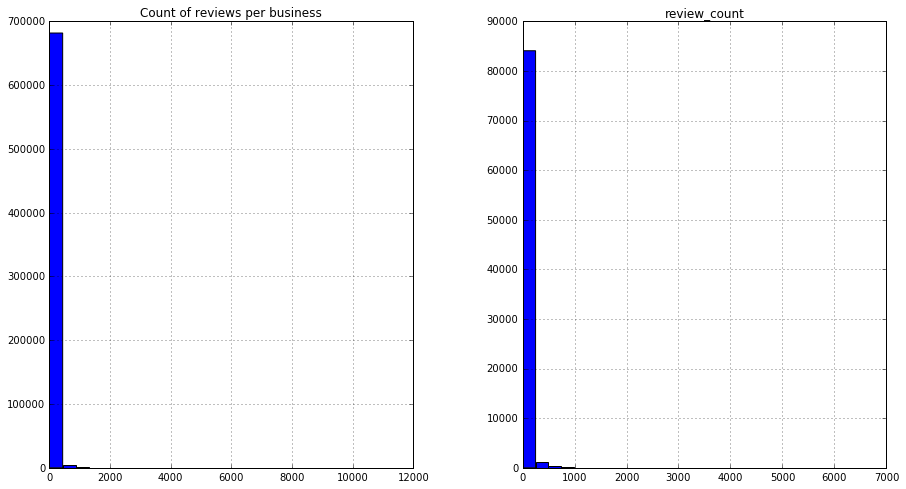

In [161]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
users.hist(column='review_count',
           ax=axes[0],
           bins=25)
businesses.hist(column='review_count',
                ax=axes[1],
                bins=25)

axes[0].set_title('Count of reviews per user')
axes[0].set_title('Count of reviews per business')
plt.show()
# histogram of reviews per user and reviews per business

The above graphs are not very useful. We see a spread from 0 to 12000 reviews for the users and a spread from 0 to 7000 reviews for businesses. If we remove some outliers the picture of typical number of reviews per user and business amy become more clear:

In [166]:
users[['average_stars', 'fans', 'review_count']].describe()

,average_stars,fans,review_count
count,686556.000000,686556.000000,686556.000000
mean,3.746704,1.290100,25.757102
std,1.086832,11.501621,83.755973
min,0.000000,0.000000,0.000000
25%,3.230000,0.000000,2.000000
50%,3.920000,0.000000,5.000000
75%,4.600000,0.000000,17.000000
max,5.000000,3549.000000,10897.000000


In [167]:
businesses[['review_count', 'stars']].describe()

,review_count,stars
count,85901.000000,85901.000000
mean,34.352359,3.694852
std,108.677591,0.946045
min,3.000000,1.000000
25%,5.000000,3.000000
50%,10.000000,4.000000
75%,26.000000,4.500000
max,6200.000000,5.000000


The two quartiles are more representative of the truth for both of these datasets. We wish to look at the percentiles between the 10th and the 90th percentile to understand the distribution of review per user and business:

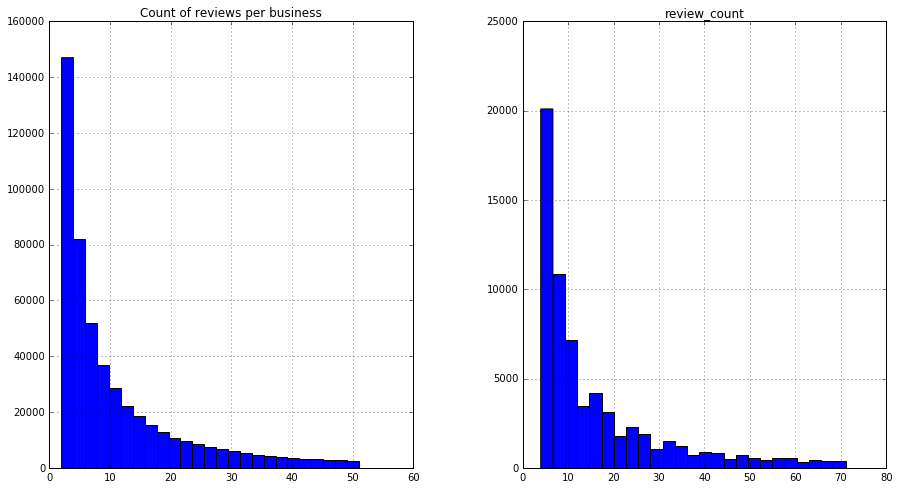

In [171]:
user_q10, user_q90 = users['review_count'].quantile(q=[0.1,0.9])
business_q10, business_q90 = businesses['review_count'].quantile(q=[0.1,0.9])
fig, axes = plt.subplots(1,2, figsize=(15,8))

users_reduced = users[((users['review_count'] > user_q10) & (users['review_count'] < user_q90))]
businesses_reduced = businesses[((businesses['review_count'] > business_q10) & (businesses['review_count'] < business_q90))]

users_reduced.hist(column='review_count',
           ax=axes[0],
           bins=25)
businesses_reduced.hist(column='review_count',
                ax=axes[1],
                bins=25)

axes[0].set_title('Count of reviews per user')
axes[0].set_title('Count of reviews per business')
plt.show()

The distribution is still dramatically right skewed, however, this is expected given the nature of people's responses to review questionaires (we expect there to be a high number of users that rate a small number businesses and a small number of users who rate a large number of businesses).

A question that arises from this plot: for the businesses that receive a high number of ratings, are the ratings more or less positive than the businesses that receive a low number of ratings? The same question can be asked of the users.

In [178]:
low_users_count = users[(users['review_count'] > 2) & (users['review_count'] < 20)]
high_users_count = users[(users['review_count'] > 40) & (users['review_count'] < 200)]

low_business_count = businesses[(businesses['review_count'] > 2) & (businesses['review_count'] < 20)]
high_business_count = businesses[(businesses['review_count'] > 40) & (businesses['review_count'] < 200)]

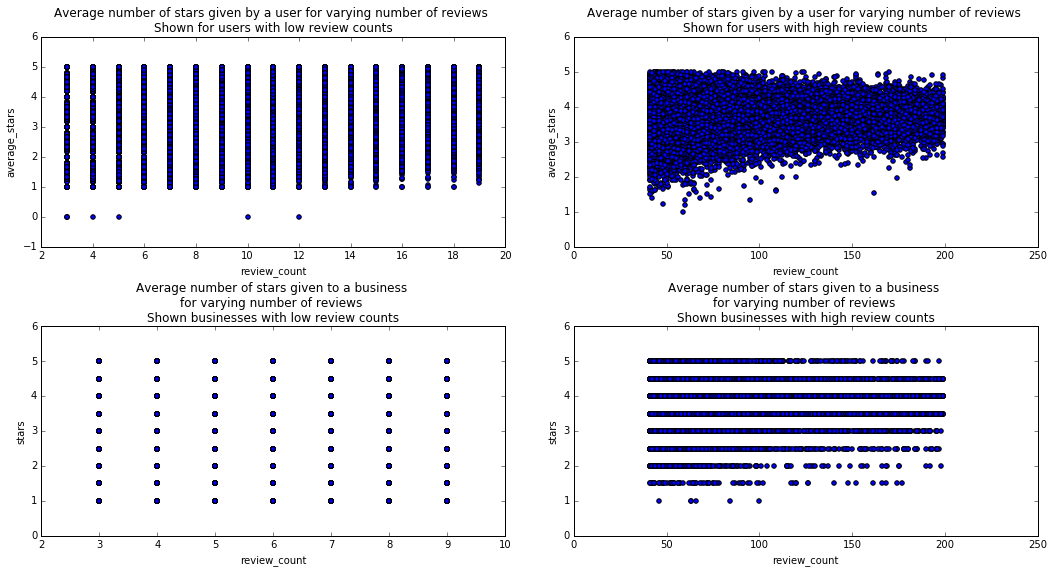

In [185]:
fig, axes = plt.subplots(2,2, figsize=(15,8))

low_users_count.plot('review_count', 'average_stars', kind='scatter', ax=axes[0,0])
high_users_count.plot('review_count', 'average_stars', kind='scatter', ax=axes[0,1])

low_business_count.plot('review_count', 'stars', kind='scatter', ax=axes[1,0])
high_business_count.plot('review_count', 'stars', kind='scatter', ax=axes[1,1])

axes[0,0].set_title('Average number of stars given by a user for varying number of reviews \nShown for users with low review counts')
axes[0,1].set_title('Average number of stars given by a user for varying number of reviews \nShown for users with high review counts')

axes[1,0].set_title('Average number of stars given to a business \nfor varying number of reviews \nShown businesses with low review counts')
axes[1,1].set_title('Average number of stars given to a business \nfor varying number of reviews \nShown businesses with high review counts')

fig.tight_layout()
plt.show()

We see no clear relationship among the number of reviews given by a user (or to a business) and the average rating that the business has (or user gives). This is a very encouraging result as a user on general will no simply vote he she always votes high. Similarily, businesses with many reviews does not imply that they business has a high rating.

We can corroborate this hypothesis by analysing the standard deviation in the reviews that a business receives (and a user gives). 

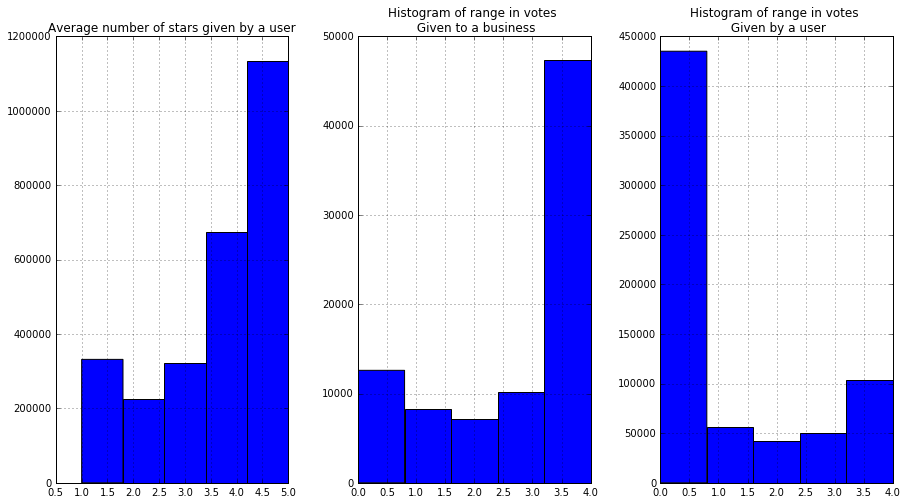

In [187]:
range_in_business_votes = reviews.groupby(['business_id']).agg({"stars": lambda x: np.max(x)-np.min(x)})
range_in_user_votes = reviews.groupby(['user_id']).agg({"stars": lambda x: np.max(x)-np.min(x)})

fig, axes = plt.subplots(1,3, figsize=(15,8))
reviews.hist(column='stars', ax=axes[0], bins=5)
range_in_business_votes.hist(column='stars', ax=axes[1], bins=5)
range_in_user_votes.hist(column='stars', ax=axes[2], bins=5)

axes[0].set_title('Average number of stars given by a user')
axes[1].set_title('Histogram of range in votes \n Given to a business')
axes[2].set_title('Histogram of range in votes \n Given by a user')

plt.show()

We see that users typically do rate businesses highly (with a clear mode being 5 stars). However, we also note that businesses see a high range of votes (a mode of 4 indicates that users differ in their opinions). Unfortunately, the hypothesis that users will change their rating schema based on the business is incorrect and we see that the majority of users rate all businesses within 1 point of each other.

In [188]:
def find_mode(values, num_bins):
    bins, edges = np.histogram(values, bins=num_bins)
    max_height_index = np.argmax(bins)
    mode = (edges[max_height_index] + edges[max_height_index + 1]) / 2.
    return mode

def sample_posterior(row, a, b, n_samples):
    stars = row['sum']
    total_ratings = row['count_nonzero']
    post_samples = np.random.beta(a + stars, b + (total_ratings - stars), n_samples)
    return find_mode(post_samples, 10)

Using a prior that assumes businesses will not be enjoyed (we wich to overcompensate for the average high ratings of users) we are able to build a more comprehensive likelyhood and thus filter the review somewhat into a more confident top and bottom grouping. The ratings alone are unreliable and we rather wish to include the number of times a business has been rated in a particular manner to calculate the likelihood that this is a favorable (or not) business). 

For example, if a business is rated poorly twice, this is an unreliable statistic and we do not wish to penalise the business from a median likelihood too dramatically. On the contrary, if a business is rated poorly 100 times, we are confident that users rate the business poorly and we wish to have a low likelihood for enjoyment.

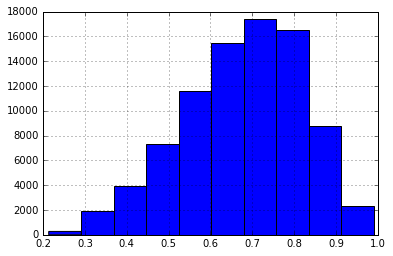

In [194]:
n_samples = 1000
a,b=8,8
businesses_sum_reviews = reviews.groupby(['business_id']).agg({"stars": [np.sum, np.count_nonzero]})['stars']
businesses_sum_reviews['count_nonzero'] *= 5
businesses_percentage_rating = businesses_sum_reviews.apply(sample_posterior, axis=1, args=(a, b, n_samples))
businesses_percentage_rating.hist(bins=10)

We now see a distribution that corresponds to a probability that this is a good business (i.e. users will like it). On the low end of the scale we have a small number of very poor businesses. We note that these businesses will have a large number of poor ratings. Similarily, on the high end, we see that there is a relatively small number of highly rated businesses. These businesses require a high number of very positive ratings to be rated into this category.

We note that we used a fairly aggressive prior assumption that all businesses have a median probability for being liked that is less than 2.5. This is to overcompensate for the generally high ratings. We now have a more normally distributed dataset 

In [195]:
# Worst 5 businesses by rating
businesses_percentage_rating.sort_values(inplace=True)
businesses[businesses['business_id'].isin(businesses_percentage_rating[:5].index)]

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
38013,{'Accepts Credit Cards': True},38013,"['Local Services', 'Shipping Centers', 'Courie...",Phoenix,"3401 E Harbour Dr\nPhoenix, AZ 85034","{'Monday': {'close': '21:00', 'open': '06:30'}...",33.418617,-112.008369,OnTrac,[],True,348,1,AZ,business
42348,{'By Appointment Only': False},42348,"['Medical Centers', 'Health & Medical']",Mesa,"6859 E Rembrandt Ave\nMesa, AZ 85212",{},33.340693,-111.684094,The Breast Cancer Society,[],False,28,1,AZ,business
42758,{'Accepts Credit Cards': True},42758,"['Security Systems', 'Home Services']",Youngtown,"12810 N 113th Ave\nYoungtown, AZ 85363",{},33.600873,-112.302024,Monitronics Security,[],True,22,1,AZ,business
44140,{},44140,"['Hotels & Travel', 'Travel Services']",Las Vegas,"4305 Dean Martin Dr\nSte 155\nLas Vegas, NV 89103",{},36.111109,-115.181755,Expedia Local Expert,[],False,26,1,NV,business
79558,{'Accepts Credit Cards': False},79558,"['Local Services', 'Data Recovery', 'IT Servic...",Phoenix,"2375 E Camelback Rd\nSte 600\nPhoenix, AZ 85016","{'Monday': {'close': '18:00', 'open': '08:00'}...",33.508909,-112.030650,Website Backup,[],True,63,1,AZ,business


In [196]:
# top 5 businesses by rating
businesses[businesses['business_id'].isin(businesses_percentage_rating[-5:].index)]

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
62649,"{'Accepts Credit Cards': True, 'By Appointment...",62649,"['Roofing', 'Home Services']",Phoenix,"22402 N 24th Ave\nPhoenix, AZ 85027","{'Monday': {'close': '17:00', 'open': '08:00'}...",33.689519,-112.110450,Stell Roofing,[],True,121,5,AZ,business
81053,"{'Accepts Credit Cards': True, 'Wheelchair Acc...",81053,"['Skin Care', 'Beauty & Spas', 'Hair Removal',...",Las Vegas,6670 S Tenaya Way\nSte 190\nSpring Valley\nLas...,"{'Monday': {'close': '20:00', 'open': '10:00'}...",36.067134,-115.251043,Simply Skin Las Vegas,['Spring Valley'],True,151,5,NV,business
81236,"{'Accepts Credit Cards': True, 'Wheelchair Acc...",81236,"['Active Life', 'Challenge Courses']",Las Vegas,"4375 S Valley View Blvd\nLas Vegas, NV 89103","{'Friday': {'close': '21:30', 'open': '09:00'}...",36.110228,-115.191387,Adventure Combat Ops,[],True,124,5,NV,business
81498,"{'Accepts Credit Cards': True, 'Wheelchair Acc...",81498,"['Henna Artists', 'Hair Removal', 'Event Plann...",Henderson,790 Coronado Center Dr\nSte 140\nAnthem\nHende...,"{'Monday': {'close': '20:00', 'open': '10:00'}...",36.002963,-115.107726,Khina Eyebrow Threading & Henna Art,['Anthem'],True,133,5,NV,business
82912,{'Accepts Credit Cards': True},82912,"['Local Services', 'Appliances & Repair']",Henderson,"Henderson, NV 89011","{'Monday': {'close': '19:30', 'open': '07:30'}...",36.103626,-114.939821,Absolute Appliance Services,[],True,105,5,NV,business


## Time series analysis:

In [197]:
# Add a useful date column to the review data
reviews['date']=pd.to_datetime(reviews.year*10000+reviews.month*100+reviews.day,format='%Y%m%d')

earliest_review = reviews.iloc[reviews.date.argmin()]
latest_review = reviews.iloc[reviews.date.argmax()]
print 'Reviews from %i/%i/%i to %i/%i/%i' % (earliest_review.year, earliest_review.month, earliest_review.day, 
                                            latest_review.year, latest_review.month, latest_review.day)

Reviews from 2004/10/12 to 2016/7/19


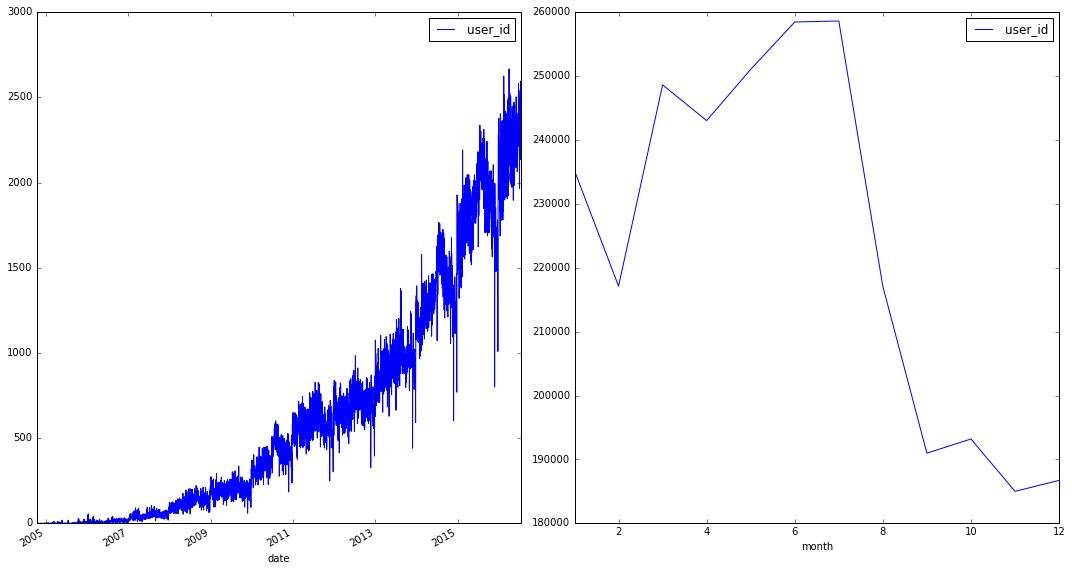

In [198]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

day_groups = reviews.groupby('date')
month_groups = reviews.groupby('month')

reviews_per_day = day_groups.agg({'user_id': np.count_nonzero})
reviews_over_months = month_groups.agg({'user_id': np.count_nonzero})

reviews_per_day.plot(ax=axes[0])
reviews_over_months.plot(ax=axes[1])

fig.tight_layout()

Note, yelp has become more popular over time. June and July are the most popular months??

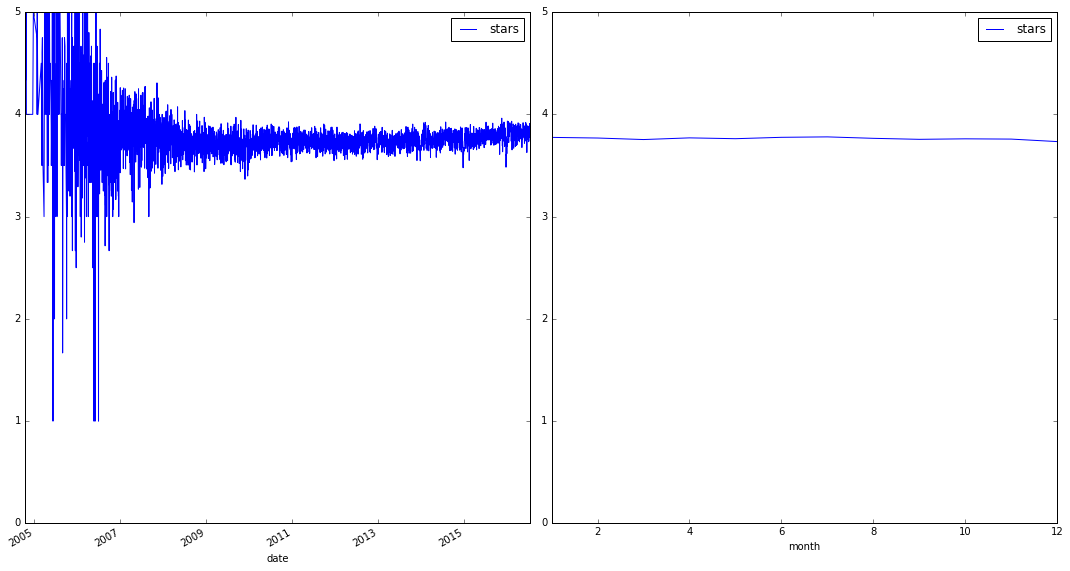

In [199]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

day_groups = reviews.groupby('date')
month_groups = reviews.groupby('month')

reviews_per_day = day_groups.agg({'stars': np.mean})
reviews_over_months = month_groups.agg({'stars': np.mean})

reviews_per_day.plot(ax=axes[0])
reviews_over_months.plot(ax=axes[1])

axes[1].set_ylim([0,5])
axes[0].set_ylim([0,5])

fig.tight_layout()

Some interesting statistics to look for:
- Number of new users attending a business
- Number of users returning to a business
- Average reviews over time

In [200]:
# Group the dataframe by users and then businesses
user_bus_grouped = reviews.groupby(['user_id', 'business_id'])
user_bus_stars_mean_and_count = user_bus_grouped.agg({'stars': [np.mean, np.count_nonzero]})

In [201]:
# For each user count the number of unique ratings and compare this to the total number of ratings
reviews_per_bus = reviews.groupby(['user_id']).business_id.size()/reviews.groupby(['user_id']).business_id.nunique()
reviews_per_bus.describe()

count    686556.000000
mean          1.017483
std           0.112315
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          11.000000
dtype: float64

/Users/nickhoernle/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


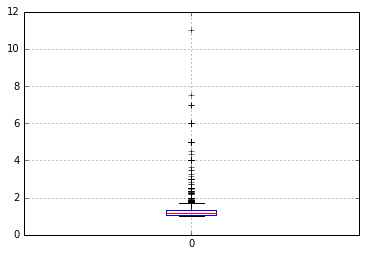

In [202]:
pd.DataFrame(reviews_per_bus[reviews_per_bus!=1]).boxplot()
plt.show()

Majority of reviews are once off. For the users that returned: